### 문서들간의 유사도 측정하기
- 문서들간의 유사도는 어떻게 측정할까? 이는 단어의 의미적인 관계를 고려해야하기 때문에 단어를 벡터화하여 벡터들 간의 거리를 측정한다. 벡터간의 거리를 대표적인 방법으로는 '유클리디안 거리'가 있지만 '유클리디안 거리'는 이는 단어 빈도수 측면에서 한계가 존재한다.<br><br>

- 따라서 코사인 유사도(Cosine Similarity)를 사용한다. 즉 벡터들 간의 사잇값을 계산하여 유사도를 측정하게 된다. 
    - Clustering의 Distance Function의 종류 https://techblog-history-younghunjo1.tistory.com/84

<img src='dataset/cosine.png'>

<img src='dataset/cosine1.png'>

- 코사인 유사도는 두 벡터간의 각도에 따라 -1 ~ 1 사이의 값으로 계산이 된다. 그리고 그 각도에 따라 두 벡터(NLP에서는 2개의 단어들)간의 관계를 파악할 수 있다.<br><br>

- Cosine 0° : 두 벡터(단어)간에 매우 유사한 관계를 지닌다. Cosine Similarity값은 1이 된다.
- Cosine 90° : 두 벡터간에 관계가 없음을 의미한다. Cosine Similarity값은 0이 된다. 
- Cosine 180° : 두 벡터간에 반대관계를 의미한다. Cosine Similarity값은 -1이 된다.<br><br>

- 하지만 텍스트 즉, 단어들을 Feature화 시킬 때 음수값이 나올 수 없으므로 Cosine 180°인 경우는 존재하지 않는다.
- 따라서 단어 벡터들간의 유사도는 0 ~ 1사이의 값으로 나오게 된다.

- 코사인 유사도는 Scikit-learn에서 API를 제공해준다. cosine_similarity() 함수로 제공하는데, X와 y인자가 들어간다. 즉, X라는 벡터(들)에 대해서 y벡터(들)간의 유사도를 행렬로 보여준다. 마치 변수들 간의 상관관계 행렬처럼 말이다.
- 문서와 문서 간의 유사도 비교는 일반적으로 코사인 유사도(Cosine Similarity)를 사용한다
- synset 객체의 path_similarity() 메서드

### l1-norm, l2-norm
- norm은 벡터의 크기를 표현하는 것입니다.

- l1-norm은 각 원소들의 절댓값을 더한 것으로 표현합니다.(Lasso 회귀에서 사용)

- l2-norm은 각 원소들의 제곱의 합을 제곱근 해준 것으로 표현합니다.(Ridge 회귀, 라플라스 근사에서 사용)

- 이상치에 민감한 방식은 l2 norm입니다.

- Degree를 지나치게 낮게 가져가는 경우 너무 단순한 모델이 생성되어 Underfitting 되기 때문에 고편향(High Bias)성을 가지게 됩니다(과소적합, 학습이 부족한 경우)<br><br>

- 반대로 Degree를 너무 높게 가져가는 경우 지나치게 학습 데이터에 fit한 모델이 생성되어 Overfitting 문제가 발생하고 고분산(High Variace)성을 가지게 됩니다(과대적합, 학습이 많은 경우)<br><br>

- 따라서 좋은 회귀 모델을 만들기 위해선 선형 모델의 비용함수(RSS)를 최소화 하면서도 회귀 계수 값이 커지지 않는 균형점을 찾아야합니다.<br><br>

- 그 균형점을 찾기 위한 방법으로 회귀 계수의 크기를 제어하면서 과적합을 개선하기 위해 비용(Cost)함수 목표를 다음과 같이 변경할 수 있습니다.<br><br>

<img src='dataset/costfunction.png'><br><br>
- 위 수식에서 alpha는 학습 데이터 적합 정도와 회귀 계수의 크기를 제어하는 튜닝 파라미터입니다.<br><br>
- 위 수식의 최소값을 만족하는 W 벡터를 찾기 위해 alpha 값의 역할은 다음과 같다.<br><br>
- alpha 값을 크게 가져간다면 회귀 계수 W를 작게 가져가는 것으로 과적합을 개선할 수 있으며 alpha 값을 작게 가져가는 경우 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하여 데이터 적합을 개선할 수 있게 됩니다.<br><br>
- 이처럼 alhpa 값을 0에서부터 지속적으로 증가시켜 회귀 계수 값의 크기를 감소시키는 것이 가능하며 비용 함수에 alhpa 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방법을 규제(Regularization) 이라고 합니다.

### 라쏘(LASSO)
- 기존의 선형 회귀에선 적절한 가중치와 편향을 찾아내는 것이 관건이었다.<br><br>
- 라쏘는 거기에 추가적인 제약 조건을 준다. 바로 MSE가 최소가 되게 하는 가중치와 편향을 찾으면서 동시에, 가중치들의 절댓값의 합이 최소가 되게 한다는 것이다. <br><br>
- 다시 말해, 가중치의 모든 원소가 0이 되거나 0에 가깝게 되도록 해야 한다. 따라서 어떠한 특징들은 모델을 만들 때 사용되지 않기도 한다. <br><br>
- 어떤 벡터 요소의 절댓값의 합은 L1-norm이다. 즉, 라쏘는 L1-norm 페널티를 가진 선형 회귀 방법이다. <br><br>

### 릿지(Ridge)
- 릿지는 패널티 항에 L1-norm 대신에 L2-norm 패널티를 가진다. 차이가 있다면 라쏘는 가중치들이 0이 되지만, 릿지의 가중치들은 0에 가까워질 뿐 0이 되지는 않는다. 특성이 많은데 그중 일부분만 중요하다면 라쏘가, 특성의 중요도가 전체적으로 비슷하다면 릿지가 좀 더 괜찮은 모델을 찾아줄 것이다. <br><br>
- 릿지는 W의 제곱에 대해 패널티를 부여하는 방법을 사용하며 L2 규제를 적용한 회귀를 말한다.

In [48]:
import numpy as np

# 두 벡터 A와 B의 내적 값은 두 벡터의 크기를 곱한 값의 코사인 각도 값을 곱한 것 
def cos_similarity(v1,v2):
    dot_product = np.dot(v1,v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    # 벡터의 길이 -> 총 벡터의 크기는 제곱합의 루트 * 제곱합의 루트
    # 유사도는 두 벡터 내적을 총 벡터 크기의 합으로 나눈 것
    similarity = dot_product/l2_norm
    return similarity

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

# doc_list로 정의된 3개의 문서의 유사도 비교를 위해 TF-IDF로 벡터화된 행렬로 변환
tfidf_vect_simple = TfidfVectorizer() # TF-IDF 객체 생성
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list) # 위에서 생성한 객체에 fit.transform()

# feature_vect_simple.toarray()
feature_vect_simple.shape

(3, 18)

In [4]:
print(feature_vect_simple)

  (0, 2)	0.41556360057939173
  (0, 13)	0.41556360057939173
  (0, 8)	0.24543855687841593
  (0, 0)	0.41556360057939173
  (0, 15)	0.49087711375683185
  (0, 14)	0.24543855687841593
  (0, 17)	0.24543855687841593
  (0, 6)	0.24543855687841593
  (1, 16)	0.39624495215024286
  (1, 7)	0.39624495215024286
  (1, 12)	0.39624495215024286
  (1, 10)	0.3013544995034864
  (1, 8)	0.2340286519091622
  (1, 15)	0.2340286519091622
  (1, 14)	0.2340286519091622
  (1, 17)	0.4680573038183244
  (1, 6)	0.2340286519091622
  (2, 3)	0.3098560092999078
  (2, 4)	0.3098560092999078
  (2, 9)	0.3098560092999078
  (2, 1)	0.3098560092999078
  (2, 5)	0.3098560092999078
  (2, 11)	0.3098560092999078
  (2, 10)	0.23565348175165166
  (2, 8)	0.1830059506093466
  (2, 15)	0.3660119012186932
  (2, 14)	0.1830059506093466
  (2, 17)	0.3660119012186932
  (2, 6)	0.1830059506093466


In [51]:
# 반환된 행렬은 희소 행렬이므로 앞에서 작성한 cos_similarity()함수의 인자인 array로 만들기 위해
# 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환
feature_vect_simple.toarray()

array([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
        0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
        0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
        0.49087711, 0.        , 0.24543856],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
        0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
        0.23402865, 0.39624495, 0.4680573 ],
       [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
        0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
        0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
        0.3660119 , 0.        , 0.3660119 ]])

In [52]:
import numpy as np

# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 변환된 밀집 행렬을 다시 각각의 배열로 변환(reshape)하고 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,) # feature_vect_dense[0]은 doc_list 첫 번째 문서의 피처 벡터화
vect2 = np.array(feature_vect_dense[1]).reshape(-1,) # feature_vect_dense[1]은 doc_list 두 번째 문서의 피처 벡터화

# 첫 번째 문장과 두 번쨰 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출 -> cos_similarity
similarity_simple = cos_similarity(vect1,vect2)
print(f'코사인 유사도:{similarity_simple:.4f}')

# 1에 가까울수록 유사도가 높다고 판단

코사인 유사도:0.4021


In [53]:
# feature_vect_simple의 결과는 희소 행렬이므로 밀집 행렬로 변환 후 다시 각각을 배열로 변환
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

# 변환한것들의 유사도
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1 과 3의 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2 와 문장 3의 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장 1 과 3의 Cosine 유사도 : 0.404
문장 2 와 문장 3의 Cosine 유사도 : 0.456


- 사이킷런은 코사인 유사도를 측정하기 위해 sklearn.metrics.pairwise.cosine_similarity API를 제공한다.
- cosine_similarity()함수는 두 개의 입력 파라미터를 받는다
- 첫 번째 파라미터는 비교 기준이 되는 문서의 피처 행렬
- 두 번째 파라미터는 비교되는 문서의 피처 행렬이다.
- cosine_similarity()는 희소 행렬, 밀집 행렬 모두가 가능하며, 행렬 또는 배열 모두 가능하다.
- 따라서 앞에서 만든 cos_similarity()함수와 같이 별도의 변환 작업이 필요 없다.

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# cosine_similarity(비교 기준이 되는 문서의 피처 행렬, 비교되는 문서의 피처 행렬)
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)
# 첫 번째 유사도 값인 1은 비교 기준인 첫 번째 문서 자신에 대한 유사도 측정이다.
# 두 번재 유사도 값인 0.40207758은 첫 번째 문서와 두 번째 문서의 유사도,
# 0.40425045는 첫 번째 문서와 세 번째 문서의 유사도 값이다.

[[1.         0.40207758 0.40425045]]


In [11]:
# 1을 삭제하려면 비교 대상에서 feature_vect[1:]을 이용해 비교 기준 문서를 제외한다
from sklearn.metrics.pairwise import cosine_similarity

# 비교기준이 되는 문서와, 비교기준 처음꺼 제외시키고 비교
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [13]:
# cosine_similarity()는 쌍(pair)으로 코사인 유사도 값을 제공한다.
# 1번째 문서와 2,3번째 문서의 코사인 유사도
# 2번째 문서와 1,3번째 문서의 코사인 유사도
# 3번째 문서와 1,2번째 문서의 코사인 유사도를 ndaary 형태로 제공한다.
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape :', similarity_simple_pair.shape)

# cosine_similarity()의 반환 값은 (3,3) 형태의 ndarray이다.

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape : (3, 3)


### Opinion Review 데이터 세트를 이용한 문서 유사도 측정 

데이터 불러오기

In [69]:
import glob, os

# 경로 지정 (r string으로 탈출문자 그대로 인식)
path = r'C:\cakd5\workspace\m8_머신러닝적용\dataset\OpinosisDataset1.0\topics'

# path에 존재하는 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))

filename_list = []
opinion_text = []

for file in all_files:
    # 경로 등 제거 후 순수 파일명만 저장
    filename_ = file.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    
    # 각 파일 데이터 프레임으로 생성 후 to_string으로 text화
    df = pd.read_table(file, index_col=None, header=0, encoding='latin1')
    opiniontext = df.to_string().replace("   ", "") # 첫 공백 제거
    opinion_text.append(opiniontext)
    
# 파일명, 파일내용을 데이터 프레임으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

피처벡터화

In [70]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)
    
    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)
    
    # 단어 원형 추출
    return LemTokens(word_tokens)

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english' , ngram_range=(1,2), 
                             tokenizer = LemNormalize, min_df=0.05, max_df=0.85)

# 피처 벡터화: TF-IDF
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

문서군집화

In [72]:
from sklearn.cluster import KMeans

# KMeans: 3
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)

# cluster 및 중심 좌표 정보
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# cluster 라벨 추가
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0but for the m...",0
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and ve...",2
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my com...,0
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb ....,0
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh...",0


##### 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도를 확인한다.
- 문서를 피처 벡터화해 변환하면 문서 내 단어(Word)에 출현 빈도와 같은 값을 부여해 각 문서가 단어 피처의 값으로 벡터화된다
- 이렇게 각 문서가 피처 벡터화된 데이터를 cosine_simularity()함수를 이용해 상호 비교해 유사도를 확인한다.
- 먼저 이를 위해 호텔을 주제로 군집화된 데이터를 먼저 추출하고 이 데이터에 해당하는 TfidfVectorizer의 데이터를 추출한다. 호텔 군집화 데이터를 기반으로 별도의 TF-IDF 벡터화를 수행하지 않고, 바로 위에서 TFidfVectorizer로 만들어진 데이터에서 그대로 추출한다.
- DataFrame 객체 변수인 document_df에서 먼저 호텔로 군집화된 문서의 인덱스를 추출한다. 이렇게 추출된 인덱스를 그대로 이용해 TfidfVectorizer 객체 변수인 feature_vect에서 호텔로 군집화된 문서의 피처 벡터를 추출한다.

문서 유사도

In [75]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1(호텔)인 인덱스
hotel_indexes = document_df[document_df['cluster_label']==1].index

# 호텔 군집 중 첫 번째 문서 파일명
comparison_docname = document_df.iloc[hotel_indexes[0]]["filename"]
print("호텔 군집 첫 문서:", comparison_docname)

# 호텔 군집 첫 번째 문서와 호텔 군집 문서 전체간의 코사인 유사도
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

# 군집 1은 호텔에 대한 리뷰로 군집화되어 있다.
# index를 활용해 호텔 군집 첫 번째 문서, 호텔 군집 문서 전체의 코사인 유사도를 확인하였다.
# 이를 조금 더 직관적으로 보기 위해 시각화 해보자.

호텔 군집 첫 문서: comfort_honda_accord_2008
[[1.         0.83336293 0.15671819 0.33326672 0.25931963 0.16839635
  0.27741338 0.18539695 0.65960841 0.06385438]]


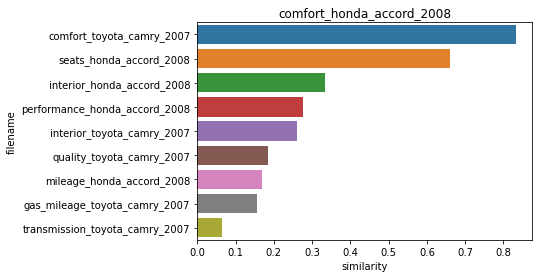

In [76]:
# 첫 번재 문서와 다른 문서 간에 유사도가 높은 순으로 이를 정렬하고 시각화
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 호텔 군집 문서 파일명 데이터 프레임
hotel = document_df.iloc[hotel_indexes][["filename"]].reset_index(drop=True)

# 코사인 유사도 추가
# cosine_similarity()는 쌍 형태의 ndarray를 반환하므로 이를 판다스 인덱스로 이용하기 위해 reshape(-1)로 차원을 변경해야 한다.
hotel["similarity"] = similarity_pair.reshape(-1,1)

# 첫 번째 문서 제외 후 내림차순 정렬
hotel_fin = hotel.iloc[1:].sort_values(by="similarity", ascending=False)

# 시각화
sns.barplot(x="similarity", y="filename", data=hotel_fin)
plt.title(comparison_docname)
plt.show()

해석 : 첫 번째 문서가 어떤 문서와 유사한지 보다 편하게 확인 가능하다.